In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#IMPORTS
from keras.utils.np_utils import to_categorical
# import keras
import pandas as pd
import numpy as np
import random
# import brewer2mpl
import sys
import warnings
from google.colab import files
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2



import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [ ]:
# %cd ..

In [ ]:
!ls drive/MyDrive

In [ ]:
initial_df = pd.read_csv (r'/content/drive/MyDrive/CFD 3.0 Norming Data and Codebook.csv')
print (initial_df)

In [ ]:
list(initial_df.columns)

In [ ]:
listOfUsefulColumns=['Model',
 'EthnicitySelf',
 'GenderSelf',
 'AgeSelf',
 'AgeRated',
 'FemaleProb',
 'MaleProb',
 'AsianProb',
 'ChineseAsianProb',
 'JapaneseAsianProb',
 'IndianAsianProb',
 'OtherAsianProb',
 'MiddleEasternProb',
 'BlackProb',
 'LatinoProb',
 'MultiProb',
 'OtherProb',
 'WhiteProb',
 'Afraid',
 'Angry',
 'Attractive',
 'Babyfaced',
 'Disgusted',
 'Dominant',
 'Feminine',
 'Happy',
 'Masculine',
 'Prototypic',
 'Sad',
#  'Suitability',
 'Surprised',
 'Threatening',
 'Trustworthy',
 'Unusual',
 'Warm',
 'Competent',
 'SocialStatus',
 'LuminanceMedian']
df=initial_df[listOfUsefulColumns]
df

In [ ]:
# delete a single row by index value 0
df = df.drop(labels=0, axis=0)
df

In [ ]:
!ls /content/drive/MyDrive/CFD/N

In [ ]:
data= "/content/drive/MyDrive/CFD/N/"
ldseg=np.array(os.listdir(data))

In [ ]:
def renameStuff():
  for filename in ldseg:
    parts =filename.split("-")
    newFilename= parts[1]+"-"+parts[2]+".jpg"
    print(newFilename)
    src =data+ filename
    dst =data+ newFilename
    os.rename(src, dst)

In [ ]:
# renameStuff()

In [ ]:
list(df["Model"])

In [ ]:
df["image"] = ""

In [ ]:
directory = r'/content/drive/MyDrive/CFD/N/'
# i=1; 
for filename in os.listdir(directory):
  parts=filename.split(".")
  # print(parts)
  if parts[0] in list(df["Model"]):
      # print(filename)
      img= cv2.imread(directory+filename)
      img = img[..., ::-1]
      # print(i)
      # i=i+1
      listWrappedImage=[img]
      df["image"][df.index[df["Model"]==parts[0]]]=listWrappedImage
  else:
      continue
        
# img1 = cv2.imread('img1.png')
# img2 = cv2.imread('img2.png')

# df = pd.DataFrame()
# df['img'] = [img] # Wrap image in python list

# # Add another row using the "dictionary way"
# d2 = {'img': [img2]}
# df2 = pd.DataFrame.from_records(d2)
# df.append(df2)

In [ ]:
checkPointDF=df.copy()

# **Here is the CHECKPOINT**

In [ ]:
df=checkPointDF[checkPointDF["image"]!=""]

In [ ]:
# df.head(10)

In [ ]:
targetColumn="Attractive"

In [ ]:
df.columns

In [ ]:
floatTypeColumns= [
 'AgeSelf',
 'AgeRated',
 'FemaleProb',
 'MaleProb',
 'AsianProb',
 'ChineseAsianProb',
 'JapaneseAsianProb',
 'IndianAsianProb',
 'OtherAsianProb',
 'MiddleEasternProb',
 'BlackProb',
 'LatinoProb',
 'MultiProb',
 'OtherProb',
 'WhiteProb',
 'Afraid',
 'Angry',
 'Attractive',
 'Babyfaced',
 'Disgusted',
 'Dominant',
 'Feminine',
 'Happy',
 'Masculine',
 'Prototypic',
 'Sad',
#  'Suitability',
 'Surprised',
 'Threatening',
 'Trustworthy',
 'Unusual',
 'Warm',
 'Competent',
 'SocialStatus',
 'LuminanceMedian']

for column in floatTypeColumns:
  # print(column)
  df[column] = df[column].astype(float)





In [ ]:
df.dtypes

In [ ]:
# df=df.drop("Suitability", axis=1)

In [ ]:
df[targetColumn].describe()

In [ ]:
def create_histogram_for_one_feature(dataframe, column_name):
  dataframe[column_name].hist()
  plt.show()
  
# box and whisker plots for one Feature
def createBoxAndWhiskerPlotForOneFeature(dataframe, nameOfColumn):
  dataframe[nameOfColumn].plot(kind='box', layout=(5,5), sharex=False, sharey=False)
  plt.show()

In [ ]:
create_histogram_for_one_feature(df, targetColumn)

In [ ]:
# df["image"]

In [ ]:
maxValue= max(list(df[targetColumn]))
minValue= min(list(df[targetColumn]))

print(maxValue)
print(minValue)

In [ ]:
# equalRange= (maxValue-minValue)/3
# equalRange

In [ ]:
largeValue=100
tempColumn= df[targetColumn]

In [ ]:
equalSizeClasses=df.copy()
roundClasses=df.copy()
ceilClasses=df.copy()

In [ ]:
low=df[targetColumn].quantile(0.33)
high=df[targetColumn].quantile(0.71)

In [ ]:

tempColumn[df[targetColumn]< low]= largeValue
tempColumn[df[targetColumn]< high]= largeValue+1
tempColumn[df[targetColumn]<= maxValue]= largeValue+2

In [ ]:
tempColumn[df[targetColumn]==largeValue]=0
tempColumn[df[targetColumn]==largeValue+1]=1
tempColumn[df[targetColumn]==largeValue+2]=2

In [ ]:
equalSizeClasses[targetColumn]= tempColumn.astype("int")
create_histogram_for_one_feature(equalSizeClasses, targetColumn)

In [ ]:
ceilClasses[targetColumn]=ceilClasses[targetColumn].apply(np.ceil)
create_histogram_for_one_feature(ceilClasses, targetColumn)

In [ ]:
roundClasses.Attractive = roundClasses.Attractive.round()
create_histogram_for_one_feature(roundClasses, targetColumn)

In [ ]:
df=equalSizeClasses

In [ ]:
maxValue= max(list(df[targetColumn]))
minValue= min(list(df[targetColumn]))

print(maxValue)
print(minValue)

In [ ]:
# list(df[targetColumn])

In [ ]:
df[targetColumn].describe()

In [ ]:
create_histogram_for_one_feature(df,targetColumn )

In [ ]:
createBoxAndWhiskerPlotForOneFeature(df,targetColumn )

In [ ]:
print(df.groupby(targetColumn).size())

In [ ]:
#use stratfied samplying
sizeOfSampleFromEachClass=min(df.groupby(targetColumn).size())
# sizeOfSampleFromEachClass=10
stradifiedSampleDF=df.groupby(targetColumn, group_keys=False).apply(lambda x: x.sample(min(len(x), sizeOfSampleFromEachClass)))
print(stradifiedSampleDF.groupby(targetColumn).size())
# stradifiedSampleDF=oringinalDataset

In [ ]:
X= list(stradifiedSampleDF["image"])
Y= list(stradifiedSampleDF[targetColumn])

In [ ]:
# Y= oneHotEncode(Y)
X= np.array(X)


In [ ]:

def swap(lista, indexa,indexb):
  temp=lista[indexa]
  lista[indexa]=lista[indexb] 
  lista[indexb]=temp 


In [ ]:
# image=x_train[4]
# # for i in range(0,3):
# #   for j in range(i,3):
# #     print(i,j)
# #     for height in image:
# #       for width in height:
# #         swap(width,i,j)
# #     print (image.shape)
# #     plt.imshow(image)
# #     plt.show()
  
# for image in X:
#   for height in image:
    
#     for width in height:
#       swap(width,0,2)
# print (image.shape)
# plt.imshow(image)
# plt.show()

# image=x_train[0]
# for height in image:
#     for width in height:
#       swap(width,2,0)
#   print (image.shape)
#   plt.imshow(image)
#   plt.show()

In [ ]:
def overviewOfInputData(startIndex: int, endIndex: int, data):
    """
    The function plots some of the pictures.
    
    Arguments:
    startIndex: the index of the first pictue to be shown 
    endIndex: the index of the last pictue to be shown 
    data: this is the np array containing the pictures.
    """
    fig = plt.figure(figsize=(20,20))
    for i in range(startIndex, endIndex+1):
        input_img = data[i]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img, cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

def showPicture(index:int, data ):
  """
  The function plots the picture with the given index.
  
  Arguments:
  index: the index of the picture to be 
  data: this is the np array containing the pictures.
  """
  input_img = data[index] 
  print (input_img.shape)
  plt.imshow(input_img)
  plt.show()

In [ ]:
overviewOfInputData(0,23, X)

In [ ]:
from PIL import Image

# for index, image in enumerate(X):
#   entry = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
#   X[index] = Image.fromarray(entry)


In [ ]:
%cd ..

In [ ]:
!ls

In [ ]:
%cd /content/drive/MyDrive

In [ ]:
!ls

In [ ]:
!mkdir AttracivenessSecond

In [ ]:
%cd AttracivenessSecond

In [ ]:
  !rm -rf Training
  !rm -rf Training/NotAttractive
  !rm -rf Training/ModeratelyAttractive
  !rm -rf Training/VeryAttractive

  !rm -rf Test
  !rm -rf Test/NotAttractive
  !rm -rf Test/ModeratelyAttractive
  !rm -rf Test/VeryAttractive

In [ ]:
  !mkdir Training
  !mkdir Training/NotAttractive
  !mkdir Training/ModeratelyAttractive
  !mkdir Training/VeryAttractive

  !mkdir Test
  !mkdir Test/NotAttractive
  !mkdir Test/ModeratelyAttractive
  !mkdir Test/VeryAttractive

In [ ]:
from PIL import Image
NumbersToLabels = {0: 'NotAttractive' , 1:'ModeratelyAttractive', 2: 'VeryAttractive'} 


def saveTypeOfData(Images,Labels,typeOfData):
  nameOfFolder=typeOfData+"/"
  for number,image in enumerate(Images):
    nameOffile=nameOfFolder+NumbersToLabels[Labels[number]]
    imageName=nameOffile+"/image"+str(number)+".jpeg"
    # image=image.reshape(image.shape[0],image.shape[1], )
    image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
    im = Image.fromarray(image)
    im.save(imageName)


def save_data(trainingImages,traininLabels, testImages,testLabels):
  saveTypeOfData(trainingImages,traininLabels,"Training")
  saveTypeOfData(testImages,testLabels,"Test")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [ ]:
# x_train

In [ ]:
save_data(x_train,y_train, x_test, y_test)

In [ ]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def oneHotEncode(lista:list):
  # define example
  data = lista
  values = array(data)
  # print(values)
  # integer encode
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)
  # print(integer_encoded)
  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  onehot_encoded= onehot_encoded.astype(int)
  return onehot_encoded
  # print(onehot_encoded)
  # # invert first example
  # inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
  # print(inverted)

In [ ]:
train_dir = "/content/Training" #passing the path with training images
test_dir = "/content/Test"   #passing the path with testing images
img_size = 224 #original size of the image

In [ ]:
# hyperparameters={ 
#   "rowShape":48,
# "columnShape":48,


# 	    "rotation_range":10,
#       "width_shift_range":0.1,
#       "height_shift_range":0.1,
#       "shear_range":0.0,
#       "zoom_range":0.0,
#       "horizontal_flip":True,
#       "fill_mode":'nearest',
#       "batch_size":32,
#       # "shuffle":True,

#       "kernel_width":6,
#       "kernel_height":6,
#       "pool_size_width":3,
#       "pool_size_height":3,
      
#       "epochs":3,
#       "verbose": 1,

#       "optimizer":'adam'



# }


In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

  plt.show()

f

In [ ]:
# # load the pre-trained model with global average pooling as the last layer and freeze the model weights
# pre_trained_model = model(include_top=False, pooling='avg', input_shape=(input_shape[0],input_shape[1],3))
# pre_trained_model.trainable = False

# # custom modifications on top of pre-trained model
# currentModel = tf.keras.models.Sequential()
# currentModel.add(pre_trained_model)
# currentModel.add(tf.keras.layers.Flatten())
# # tf.keras.layers.Dense(128, activation='relu',kernel_initializer=Heinitializer),
# # tf.keras.layers.Dense(32, activation='relu',kernel_initializer=Heinitializer),
# tf.keras.layers.Dense(7, activation='softmax',kernel_initializer=Heinitializer)
# currentModel.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
# currentModel.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# history = currentModel.fit(train_generator, epochs=temp_epochs, validation_data=validation_generator, 
#                         # steps_per_epoch=steps_per_epoch,validation_steps= validation_steps
#                         )

In [ ]:
# pre_trained_model.trainable = False

# # Let's take a look to see how many layers are in the base model
# print("Number of layers in the base model: ", len(pre_trained_model.layers))

# # Fine-tune from this layer onwards
# fine_tune_at = 6

# # Freeze all the layers before the `fine_tune_at` layer
# for layer in pre_trained_model.layers[:fine_tune_at]:
#   layer.trainable =  False

# currentModel.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fine_tune_epochs = 1
# total_epochs =  temp_epochs + fine_tune_epochs

# history_fine = currentModel.fit(train_generator, epochs=temp_epochs, validation_data=validation_generator,
#                             initial_epoch=history.epoch[-1] 
#                         # steps_per_epoch=steps_per_epoch,validation_steps= validation_steps
#                         )

# ***New Ideas***

1. Create a new larger dataset using data augmentation 
2. Save the outputs of the layes you are not training so it dousnt have to go through the Covolutional layers to save training time. 
    pointer: Use the pre-processing of the model you will use in the pipeline. 
3. Use these as input to the MLP

*Create a new larger set using data augmentation*

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt




In [ ]:
# data_dir = pathlib.Path(train_dir)
# image_count = len(list(data_dir.glob('*/*.jpg')))
# print(image_count)

In [ ]:
# images = list(data_dir.glob('A/*'))
# PIL.Image.open(str(images[5]))

In [ ]:
batch_size = 32
img_height = 160
img_width = 160
train_dir = "/content/drive/MyDrive/AttracivenessSecond/Training" #passing the path with training images
test_dir = "/content/drive/MyDrive/AttracivenessSecond/Test"   #passing the path with testing images


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  # validation_split=0.2,
  # subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  # validation_split=0.2,
  # subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
class_names = train_ds.class_names
print(class_names)

In [ ]:
from tensorflow.keras import layers

In [ ]:
resize_and_rescale = tf.keras.Sequential([                                
  layers.experimental.preprocessing.Resizing(img_height, img_width),
  layers.experimental.preprocessing.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2), fill_mode ="constant",fill_value=0.0)
])


In [ ]:
# # aug_ds = aug_ds.map(
# #   lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # # Batch all datasets
  # ds = ds.batch(batch_size)

  # Use data augmentation only on the training set
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), )
                # num_parallel_calls=AUTOTUNE)

  # Use buffered prefecting on all datasets
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds)
val_ds = prepare(val_ds)

In [ ]:
# images, labels = next(iter(train_ds))

In [ ]:
#  plt.imshow(images[10].numpy().astype("uint8"))


In [ ]:
# plt.figure(figsize=(10, 10))
# for i in range(9):
#   augmented_image = data_augmentation(images)
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(augmented_image[10].numpy().astype("uint8"))
#   plt.axis("off")


In [ ]:
# aug_ds = train_ds.map(
#   lambda x, y: (resize_and_rescale(x, training=True), y))

In [ ]:
hyperparameters={ 
  "rowShape":160,
"columnShape":160,


	    "rotation_range":10,
      "width_shift_range":0.1,
      "height_shift_range":0.1,
      "shear_range":0.0,
      "zoom_range":0.0,
      "horizontal_flip":True,
      "fill_mode":'nearest',
      "batch_size":32,
      # "shuffle":True,

      "kernel_width":6,
      "kernel_height":6,
      "pool_size_width":3,
      "pool_size_height":3,
      
      "epochs":3,
      "verbose": 1,

      "optimizer":'adam'



}
# preprocessor = tf.keras.applications.mobilenet_v3.preprocess_input


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 3


model = tf.keras.Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255),
  # layers.Conv2D(32, 3, activation='relu'),
  # layers.MaxPooling2D(),
  # layers.Conv2D(32, 3, activation='relu'),
  # layers.MaxPooling2D(),
  # layers.Conv2D(32, 3, activation='relu'),
  # layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
  )

In [ ]:
import inspect
from tqdm import tqdm
# List all available models
model_dictionary = {m[0]:m[1] for m in inspect.getmembers(tf.keras.applications, inspect.isfunction)}

In [ ]:
model_dictionary

In [ ]:
model= model_dictionary["VGG16"]
# preprocessor = tf.keras.applications.vgg16.preprocess_input
input_shape=(224,224)
IMG_SIZE = 224
# num_classes=5

In [ ]:
# load the pre-trained model with global average pooling as the last layer and freeze the model weights
pre_trained_model = model(include_top=False, input_shape=(input_shape[0],input_shape[1],3))


In [ ]:
pre_trained_model.summary()

In [ ]:
len(pre_trained_model.layers)

In [ ]:
numberOfLayersToTrain=4
pre_trained_model.layers[len(pre_trained_model.layers)-numberOfLayersToTrain].name

In [ ]:
for layer in pre_trained_model.layers[0:len(pre_trained_model.layers)-numberOfLayersToTrain]:
  layer.trainable =  False
for layer in pre_trained_model.layers[len(pre_trained_model.layers)-numberOfLayersToTrain:len(pre_trained_model.layers)]:
  layer.trainable =  True

# pre_trained_model.trainable=False




In [ ]:
pre_trained_model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
# pre_trained_model.fit(train_ds)

In [ ]:
from keras.models import Model

# subModel = Model(pre_trained_model.input, pre_trained_model.get_layer('block1_pool').output)
# # predictions = subModel.predict(tra)

# # for layer in pre_trained_model.layers[:fine_tune_at]:
# #   layer.trainable =  False
# subModel.trainable=False;

newModel = tf.keras.models.Sequential([     
    layers.experimental.preprocessing.Resizing(224, 224),
    pre_trained_model, 
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')
]) 
newModel.build(input_shape= pre_trained_model.input.shape)


In [ ]:
# newModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
newModel.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])
newModel.summary()


In [ ]:
newModel.fit(
  train_ds  )

In [ ]:
# newModel.fit(
#   aug_ds,
#   validation_data=val_ds
#   )

In [ ]:
predictions = newModel.predict(aug_ds)

In [ ]:
print("yei")

In [ ]:
predictions.shape

In [ ]:
next_model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (hyperparameters["kernel_width"],hyperparameters["kernel_height"]), padding='same',activation='relu', kernel_initializer=Heinitializer, input_shape=(hyperparameters["rowShape"], hyperparameters["columnShape"], 3)),
    tf.keras.layers.MaxPooling2D(hyperparameters["pool_size_width"],hyperparameters["pool_size_height"] ),
    # The second convolution
    tf.keras.layers.Conv2D(32, (hyperparameters["kernel_width"],hyperparameters["kernel_height"]), padding='same', activation='relu',kernel_initializer=Heinitializer),
    tf.keras.layers.MaxPooling2D(hyperparameters["pool_size_width"],hyperparameters["pool_size_height"] ),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    # tf.keras.layers.Dense(128, activation='relu',kernel_initializer=Heinitializer),
    tf.keras.layers.Dense(16, activation='relu',kernel_initializer=Heinitializer),
    tf.keras.layers.Dense(3, activation='softmax',kernel_initializer=Heinitializer)
])

In [ ]:
from keras.models import Model

subModel = Model(pre_trained_model.input, pre_trained_model.get_layer('block1_pool').output)
subModel.trainable=False;




In [ ]:
# newModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
subModel.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])
subModel.summary()


In [ ]:
# newModel.fit(train_generator, epochs=temp_epochs, validation_data=validation_generator, 
#                         # steps_per_epoch=steps_per_epoch,validation_steps= validation_steps
#                         )
predictions= subModel.predict(
  aug_ds,
  # validation_data=val_ds
  )

In [ ]:
predictions.shape

In [ ]:
hyperparameters={
    "target_size":(160,160)
    "batch_size": 32
}

In [ ]:
train_datagen = ImageDataGenerator(
        batch_size=32
        seed=42
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(160, 160,3),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(160, 160,3),
        batch_size=32,
        class_mode='binary')

In [ ]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
pre_trained_model = load_model('/content/drive/MyDrive/facenet_keras.h5')
# summarize input and output shape
print(pre_trained_model.inputs)
print(pre_trained_model.outputs)

In [ ]:
pre_trained_model.trainable=False;

In [ ]:
# # newModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# pre_trained_model.compile(
#   optimizer='adam',
#   loss=tf.losses.SparseCategoricalCrossentropy(),
#   metrics=['accuracy'])
# pre_trained_model.summary()

In [ ]:
# pre_trained_model.fit(train_ds, validation_data=val_ds, epochs=10)

In [ ]:
# predictions= pre_trained_model.predict(train_ds)
# predictions.shape

In [ ]:
# adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(
#     learning_rate=hp.Float(
#             'learning_rate',
#             min_value=0.0001,
#             max_value=0.9,
#             default=0.2,
#             sampling='LOG',
#         )
#     )


In [ ]:
!pip install keras-tuner

In [ ]:
hyperparameters={ 
  "rowShape":160,
"columnShape":160,

	    "rotation_range":5,
      "width_shift_range":0.05,
      "height_shift_range":0.05,
      "shear_range":0.002,
      "zoom_range":0.10,
      "horizontal_flip":True,
      "fill_mode":'nearest',
      "batch_size":128,
      "shuffle":True,

      "kernel_width":4,
      "kernel_height":4,
      "pool_size_width":2,
      "pool_size_height":2,
      
      "epochs":20,
      "verbose": 1,

      "optimizer":'adam',

      "L2_lambda":0.1,

                "dropout_posibility":0.2,

        "num_of_classes":7



}
steps_per_epoch=int( 28709 / hyperparameters["batch_size"])
validation_steps=int( 3589 / hyperparameters["batch_size"])

In [ ]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
pre_trained_model = load_model('/content/drive/MyDrive/facenet_keras.h5')
# summarize input and output shape
print(pre_trained_model.inputs)
print(pre_trained_model.outputs)

In [ ]:
len(pre_trained_model.layers)

In [ ]:
numberOfLayersToTrain=5
pre_trained_model.layers[len(pre_trained_model.layers)-numberOfLayersToTrain].name

In [ ]:
# pre_trained_model.trainable = True

# for layer in pre_trained_model.layers[0:len(pre_trained_model.layers)-numberOfLayersToTrain]:
#   layer.trainable =  False
# for layer in pre_trained_model.layers[len(pre_trained_model.layers)-numberOfLayersToTrain:len(pre_trained_model.layers)]:
#   layer.trainable =  True

In [ ]:
pre_trained_model.trainable = False


In [ ]:
from kerastuner import HyperModel

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
      hyperparameters={ 
      "rowShape":160,
    "columnShape":160,
  "num_of_classes":3,

  #   "rotation_range":hp.Int(
  #     'rotation_range',
  #     min_value=0,
  #     max_value=15,
  #     default=5
  # ),
  #   "width_shift_range":hp.Float(
  #     'width_shift_range',
  #     min_value=0.00000000001,
  #     max_value=0.2,
  #     default=0.05
  # ),
  #   "height_shift_range":hp.Float(
  #     'height_shift_range',
  #     min_value=0.00000000001,
  #     max_value=0.2,
  #     default=0.05
  # ),
  #   "shear_range":hp.Float(
  #     'shear_range',
  #     min_value=0.000000000000001,
  #     max_value=0.2,
  #     default=0.05,
  #     sampling='LOG',
  # ),
  #   "zoom_range":hp.Float(
  #     'zoom_range',
  #     min_value=0.000000000001,
  #     max_value=0.35,
  #     default=0.10,
  # ),
  #   "horizontal_flip":hp.Choice(
  #     'horizontal_flip',
  #     values=[True, False],
  #     default=True
  # ),
    "fill_mode":'nearest',
    "batch_size":128,
    
    "epochs":20,
    "verbose": 1,

    "optimizer":'adam',

    "L2_lambda":hp.Float(
      'L2_lambda',
      min_value=0.000000001,
      max_value=0.5,
      default=0.1,
      sampling='LOG',
  ),
    
    "learning_rate":hp.Float(
      'learning_rate',
      min_value=0.0001,
      max_value=0.6,
      default=0.2,
      sampling='LOG',
  ),
  
    "dropout_posibility":hp.Float(
      'dropout_posibility',
      min_value=0.001,
      max_value=0.5,
      default=0.2,
  ),


  "numberOfNodesInFirstDenseLayer":hp.Choice(
      name='numberOfNodesInFirstDenseLayer',
      values=[512,256,128,64],
      # default=128
  ),

    "numberOfNodesInSecondDenseLayer":hp.Choice(
      name='numberOfNodesInSecondDenseLayer',
      values=[128,64,32,16],
      # default=16
  ),

      "numberOfNodesInThirdDenseLayer":hp.Choice(
      name='numberOfNodesInThirdDenseLayer',
      values=[16,8,4],
      # default=6
  ),

}
      Heinitializer = tf.keras.initializers.HeNormal()
      adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=hyperparameters["learning_rate"])
      model = tf.keras.models.Sequential([                 
          pre_trained_model, 
          # tf.keras.layers.GlobalAveragePooling2D(),
          tf.keras.layers.Dense(hyperparameters["numberOfNodesInFirstDenseLayer"], activation='relu', kernel_regularizer=regularizers.l2(hyperparameters["L2_lambda"]),kernel_initializer=Heinitializer),
          tf.keras.layers.Dropout(hyperparameters["dropout_posibility"]),
          tf.keras.layers.Dense(hyperparameters["numberOfNodesInSecondDenseLayer"], activation='relu', kernel_regularizer=regularizers.l2(hyperparameters["L2_lambda"]),kernel_initializer=Heinitializer),
          tf.keras.layers.Dropout(hyperparameters["dropout_posibility"]),
          tf.keras.layers.Dense(hyperparameters["numberOfNodesInThirdDenseLayer"], activation='relu', kernel_regularizer=regularizers.l2(hyperparameters["L2_lambda"]),kernel_initializer=Heinitializer),
          tf.keras.layers.Dropout(hyperparameters["dropout_posibility"]),
          tf.keras.layers.Dense(hyperparameters["num_of_classes"], activation='softmax',kernel_initializer=Heinitializer)
      ]) 
      model.build(input_shape= pre_trained_model.input.shape)
      model.compile(loss = tf.losses.SparseCategoricalCrossentropy(), optimizer=adamOptimizerWithCustomLearningRate, metrics=['accuracy'])
      # model.summary()


      return model

hypermodel = CNNHyperModel(input_shape=(hyperparameters["rowShape"], hyperparameters["columnShape"]), num_classes=3)

In [ ]:
!rm -rf random_search/
!mkdir random_search

In [ ]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=1,
    directory='random_search',
    project_name='Temporary'
)
tuner.search_space_summary()

N_EPOCH_SEARCH = 10

In [ ]:
x_train=[]
y_train=[]
for images, labels in train_ds:
  for image in images:
    x_train.append(np.asarray(image))
  for label in labels:
    y_train.append(label)
x_train=np.asarray(x_train)
y_train=np.asarray(y_train).reshape(len(y_train),1)

print(x_train.shape)
print(y_train.shape)



In [ ]:
tuner.search(x_train, y_train, epochs=N_EPOCH_SEARCH, validation_split=0.2)

Hyperparameter    |Value             |Best Value So Far 
L2_lambda         |0.13056           |2.0109e-07        
learning_rate     |0.0015407         |0.0036891         
dropout_posibility|0.34911           |0.076073          
numberOfNodesIn...|256               |384               
numberOfNodesIn...|64                |64                
numberOfNodesIn...|8                 |8

In [ ]:
Trial 9 Complete [00h 07m 30s]
val_accuracy: 0.3589743673801422

Best val_accuracy So Far: 0.5512820482254028
Total elapsed time: 01h 06m 19s

Search: Running Trial #10

Hyperparameter    |Value             |Best Value So Far 
L2_lambda         |5.5223e-15        |2.3528e-07        
learning_rate     |0.11313           |0.011169          
dropout_posibility|0.28097           |0.051156          
numberOfNodesIn...|192               |256               
numberOfNodesIn...|64                |128               
numberOfNodesIn...|32                |32

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
# Show a summary of the search
tuner.results_summary()

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]



In [ ]:
!ls

In [ ]:
!rm -rf something
!mkdir something

In [ ]:
best_model.save('something/')

In [ ]:
model = tf.keras.models.load_model('something/')
model.predict(val_ds)


In [ ]:
dropout_posibility=0.2
hyperparametersForBestModel={ 
      "rowShape":48,
    "columnShape":48,

          "rotation_range":1,
          "width_shift_range":0.05732074337790668,
          "height_shift_range":0.16706775652108483,
          "shear_range":2.500466673405063e-10,
          "zoom_range":0.16216312660751003,
          "horizontal_flip":True,
          "fill_mode":'nearest',
          "batch_size":128,
          "shuffle":False,
          "kernel_width":4,
          "kernel_height":5,
          "pool_size_width":3,
          "pool_size_height":3,
          
          "epochs":20,
          "verbose": 1,

          "optimizer":'adam',

          "L2_lambda":2.256644726563718e-10,
          
          "learning_rate":0.00032161354005584916,
        
          "dropout_posibility":0.022676424484930676,

        "num_of_classes":7


    }

In [ ]:
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()


In [ ]:
newModel = tf.keras.models.Sequential([                 
    pre_trained_model, 
    # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(3, activation='softmax',kernel_initializer=Heinitializer)
]) 
newModel.build(input_shape= pre_trained_model.input.shape)

In [ ]:
# newModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
newModel.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])
newModel.summary()


In [ ]:
numberEpochs=10

In [ ]:
# newModel.fit(train_generator, epochs=temp_epochs, validation_data=validation_generator, 
#                         # steps_per_epoch=steps_per_epoch,validation_steps= validation_steps
#                         )
history= newModel.fit(
  train_ds,
  validation_data=val_ds,
  epochs=numberEpochs
  )

In [ ]:
# plot_accuracy(history)

In [ ]:
# fine_tune_epochs = 5
# total_epochs =  10 + fine_tune_epochs

# history = newModel.fit(train_ds,
#                          epochs=total_epochs,
#                          initial_epoch=history.epoch[-1],
#                          validation_data=val_ds)

In [ ]:
# plot_accuracy(history)

In [ ]:
pre_trained_model.summary()

In [ ]:
len(pre_trained_model.layers)

In [ ]:
numberOfLayersToTrain=9
pre_trained_model.layers[len(pre_trained_model.layers)-numberOfLayersToTrain].name

In [ ]:
pre_trained_model.trainable = True

for layer in pre_trained_model.layers[0:len(pre_trained_model.layers)-numberOfLayersToTrain]:
  layer.trainable =  False
for layer in pre_trained_model.layers[len(pre_trained_model.layers)-numberOfLayersToTrain:len(pre_trained_model.layers)]:
  layer.trainable =  True

In [ ]:
newModel.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])
newModel.summary()


In [ ]:
fine_tune_epochs = 2
total_epochs =  10 + fine_tune_epochs

history_fine = newModel.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

In [ ]:
!ls drive/MyDrive

In [ ]:
%cd drive/MyDrive 

In [ ]:
# ! git clone https://github.com/AntreasAntoniou/DAGAN

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
images[0].shape

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(160, 160, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
generator = make_generator_model()

images, labels = next(iter(aug_ds))
generated_image = generator(images[0], training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
train(train_ds, EPOCHS)

In [ ]:
def resize_and_rescale(image_label):
  image, label = image_label
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

In [ ]:
!cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image111.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/VeryAttractive
!cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image111.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/NotAttractive
!cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image111.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/ModeratelyAttractive


In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE
# flipped = (
#     train_ds
#     .shuffle(1000)
#     .map(flip_horizonally, num_parallel_calls=AUTOTUNE)
#     .batch(32)
#     .prefetch(AUTOTUNE)
# )

In [ ]:
!ls

In [ ]:
  !rm -rf testing
  !rm -rf testing/NotAttractive
  !rm -rf testing/ModeratelyAttractive
  !rm -rf testing/VeryAttractive

In [ ]:
  !mkdir testing
  !mkdir testing/NotAttractive
  !mkdir testing/ModeratelyAttractive
  !mkdir testing/VeryAttractive

In [ ]:
!cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image111.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/VeryAttractive
# !cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image111.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/NotAttractive
# !cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image111.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/ModeratelyAttractive

!cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image110.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/VeryAttractive
# !cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image110.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/NotAttractive
# !cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image110.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/ModeratelyAttractive

!cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image119.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/VeryAttractive
# !cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image119.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/NotAttractive
# !cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image119.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/ModeratelyAttractive

!cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image123.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/VeryAttractive
# !cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image123.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/NotAttractive
# !cp /content/drive/MyDrive/AttracivenessSecond/Training/ModeratelyAttractive/image123.jpeg /content/drive/MyDrive/AttracivenessSecond/testing/ModeratelyAttractive

In [ ]:
from PIL import Image
NumbersToLabels = {0: 'NotAttractive' , 1:'ModeratelyAttractive', 2: 'VeryAttractive'} 

def save_dataset(dataset,typeOfData,nameOfAugmentation=""):
  nameOfFolder=typeOfData+"/"
  # try:
  i=0
  for batchNumber, (images, labels) in enumerate(dataset):
    # print("next banch")
    images=np.asarray(images)
    labels=np.asarray(labels)
    for index,image in enumerate(images):
      nameOffile=nameOfFolder+NumbersToLabels[labels[index]]
      imageName=nameOffile+"/image"+str(index)+nameOfAugmentation+str(batchNumber)+".jpeg"
      # image=image.reshape(image.shape[0],image.shape[1], )
      image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
      im = Image.fromarray(image)
      im.save(imageName)
      i=i+1
  print("i have saved "+ str(i)+" pictures")
  # except:
  #   print("cannot do final branch")



In [ ]:
def flip_horizonally(image):
  print(image.shape)
  image = tf.cast(image, tf.float32)
  flipped = tf.image.flip_left_right(image)
  return flipped


In [ ]:
import cv2
import numpy as np
import random
def translation(image, lowrange=5, highrange=20): 
  # Store height and width of the image
  height = image.shape[0]
  width  = image.shape[1]

  random_height_div= random.randint(lowrange, highrange)
  random_width_div = random.randint(lowrange, highrange)


  

  quarter_height, quarter_width = height / random_height_div, width / random_width_div
    
  T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
    
  # We use warpAffine to transform
  # the image using the matrix, T
  img_translation = cv2.warpAffine(image, T, (width, height))
  return img_translation

for i in range(10):
  plot = plt.figure(i)
  plt.imshow( translation(image).astype("uint8"))  

In [ ]:
image=np.asarray(images[0])

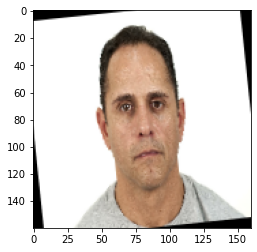

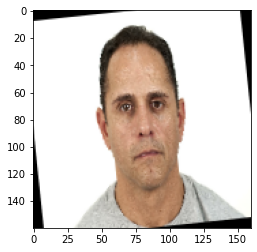

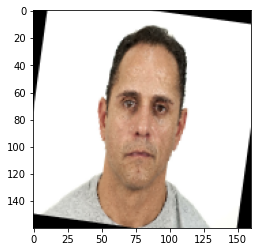

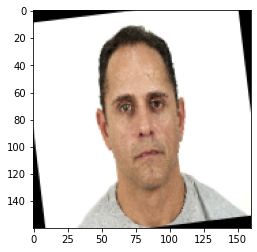

In [ ]:
import numpy as np
import cv2
import random

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

def random_rotate_image(image, degree_range=10):
  # image = tf.cast(image, tf.float32)
  randomAngle = random.randint(-degree_range,degree_range)
  # print(image.shape)
  image =  rotate_image( image, randomAngle)
  return image

for i in range(4):
  plot = plt.figure(i)
  plt.imshow( random_rotate_image(image).astype("uint8"))  

In [ ]:
IMG_SIZE=160
seed=(42,42)
def translation(image):
  image = tf.cast(image, tf.float32)
  # print(image.shape)
  image = tf.image.stateless_random_crop(
      image, size=[batch_size,int(IMG_SIZE-(IMG_SIZE/5)),int(IMG_SIZE-(IMG_SIZE/5)), 3], seed=seed)
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE, IMG_SIZE)
  return image

In [ ]:
images, labels =next(iter(train_ds))

In [ ]:
image=np.asarray(images[0]).astype(float)

In [ ]:
# image = cv2.imread('/content/drive/MyDrive/AttracivenessSecond/Test/NotAttractive/image120.jpeg')

In [ ]:
IMG_SIZE=160
seed=(42,42)
def translation(image):
  image = tf.cast(image, tf.float32)
  # print(image.shape)
  image = tf.image.stateless_random_crop(
      image, size=[batch_size,int(IMG_SIZE-(IMG_SIZE/5)),int(IMG_SIZE-(IMG_SIZE/5)), 3], seed=seed)
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE, IMG_SIZE)
  return image

In [ ]:
def turnDatasetToArray(dataset):
  ds_numpy = tfds.as_numpy(train_ds)
  lista=[]
  for array in ds_numpy:
    lista.extend(array[0])
  np_ds= np.asarray(lista)
  return np_ds


In [ ]:
def resize_and_rescale(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image

In [ ]:
batch_size = 2
img_height = 160
img_width = 160
test_dir = "/content/drive/MyDrive/AttracivenessSecond/testing"   #passing the path with testing images


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  # validation_split=0.2,
  # subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

In [ ]:
images, labels = next(iter(train_ds))
image= np.asarray(images[0])


In [ ]:
plt.imshow(image.astype("uint8")) 

In [ ]:
plt.imshow(rotate_image(image, 10 ).astype("uint8")) 

In [ ]:
# %cd /content/drive/MyDrive/AttracivenessSecond

In [ ]:
aug_ds = train_ds.map(
    lambda x, y: (flip_horizonally(x), y))
save_dataset(aug_ds, "Training", "HorizonalFlip")

In [ ]:
import random

for i in range(1):
  a=random.randint(0,42)
  b=random.randint(42,128)
  seed=(a,b)
  aug_ds = train_ds.map(
    lambda x, y: (translation(x), y))
  save_dataset(aug_ds, "Training", str("translation"+str(i)))
  

In [ ]:
np_ds= turnDatasetToArray(aug_ds)
np_ds.shape

In [ ]:
aug_ds = train_ds.map(
  lambda x, y: (flip_horizonally(x), y))
# save_dataset(aug_ds, "testing", str("testAug"))

In [ ]:
np_ds= turnDatasetToArray(aug_ds)
np_ds.shape

In [ ]:
aug_ds = train_ds.map(
  lambda x, y: (translation(x), y))
save_dataset(aug_ds, "testing", str("testAug"))

In [ ]:
images, labels = next(iter(aug_ds))

In [ ]:
images.shape

In [ ]:
#Not sure you even have to do that if you just want to visualize it
#first_array=255*first_array
#first_array=first_array.astype("uint8")
plt.imshow(images[2].numpy().astype("uint8"))
#Actually displaying the plot if you are not in interactive mode
plt.show()
# #Saving plot
# plt.savefig("fig.png")

In [ ]:
save_dataset(train_ds, "testing", "testAug")

In [ ]:
for images,labels in train_ds:
  images=np.asarray(images)
  print(images.shape)
  image= images[0]
  plt.imshow(image.astype("uint8"))


In [ ]:
ds_numpy = tfds.as_numpy(train_ds)


In [ ]:
lista=[]
for array in ds_numpy:
  # image=array[0][0]
  # print(image.shape)
  # plt.imshow(image.astype("uint8"))
  # break
  lista.extend(array[0])
  print(array[0].shape)

In [ ]:
np_ds= np.asarray(lista)
np_ds.shape
import matplotlib.pyplot as plt

plt.imshow(np_ds[2].astype("uint8"))

In [ ]:
print(np_ds.shape)
print(type(np_ds))
print(type(np_ds[0]))
print(type(np_ds[0][0]))
print(type(np_ds[0][0][0]))

In [ ]:
hyperparametersForBestModel={ 
      "rowShape":160,
    "columnShape":160,

          "rotation_range":1,
          "width_shift_range":0.05732074337790668,
          "height_shift_range":0.16706775652108483,
          "shear_range":2.500466673405063e-10,
          "zoom_range":0.16216312660751003,
          "horizontal_flip":True,
          "fill_mode":'nearest',
          "batch_size":128,
          "shuffle":False,
          "kernel_width":4,
          "kernel_height":5,
          "pool_size_width":3,
          "pool_size_height":3,
          
          "epochs":20,
          "verbose": 1,

          "optimizer":'adam',

          "L2_lambda":2.256644726563718e-10,
          
          "learning_rate":0.001,
        
          "dropout_posibility":0.0276,

        "num_of_classes":3


    }
steps_per_epoch=int( 28709 / hyperparametersForBestModel["batch_size"])
validation_steps=int( 3589 / hyperparametersForBestModel["batch_size"])

In [ ]:
adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=hyperparametersForBestModel["learning_rate"])
bestModel = tf.keras.models.Sequential([
      # Note the input shape is the desired size of the image 150x150 with 3 bytes color
      # This is the first convolution
      tf.keras.layers.Conv2D(32, (hyperparametersForBestModel["kernel_width"],hyperparametersForBestModel["kernel_height"]), padding='same',activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]), kernel_initializer=Heinitializer, input_shape=(hyperparametersForBestModel["rowShape"], hyperparametersForBestModel["columnShape"], 3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(64, (hyperparametersForBestModel["kernel_width"],hyperparametersForBestModel["kernel_height"]), padding='same', activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]), kernel_initializer=Heinitializer),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(128, (hyperparametersForBestModel["kernel_width"],hyperparametersForBestModel["kernel_height"]), padding='same', activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]), kernel_initializer=Heinitializer),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(hyperparametersForBestModel["pool_size_width"],hyperparametersForBestModel["pool_size_height"] ),
      tf.keras.layers.Dropout(hyperparametersForBestModel["dropout_posibility"]),
      # The second convolution
      tf.keras.layers.Conv2D(256, (hyperparametersForBestModel["kernel_width"],hyperparametersForBestModel["kernel_height"]), padding='same', activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(512, (hyperparametersForBestModel["kernel_width"],hyperparametersForBestModel["kernel_height"]), padding='same', activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer ),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(hyperparametersForBestModel["pool_size_width"],hyperparametersForBestModel["pool_size_height"] ),
      tf.keras.layers.Dropout(hyperparametersForBestModel["dropout_posibility"]),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer),
      tf.keras.layers.Dropout(hyperparametersForBestModel["dropout_posibility"]),
      tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer),
      tf.keras.layers.Dropout(hyperparametersForBestModel["dropout_posibility"]),
      tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer),
      tf.keras.layers.Dropout(hyperparametersForBestModel["dropout_posibility"]),
      tf.keras.layers.Dense(hyperparametersForBestModel["num_of_classes"], activation='softmax', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer)
      ]) 
bestModel.summary()
bestModel.compile(loss =tf.losses.SparseCategoricalCrossentropy() , optimizer=adamOptimizerWithCustomLearningRate, metrics=['accuracy'])


In [ ]:
bestModelHistory = bestModel.fit(train_ds, epochs=hyperparameters["epochs"], validation_data = val_ds)
plot_accuracy(bestModelHistory)

In [ ]:
def loadModel(url = 'https://drive.google.com/uc?id=1971Xk5RwedbudGgTIrGAL4F7Aifu7id1'):
	model = InceptionResNetV2()
	
	model.load_weights("/content/drive/MyDrive/Models_Herodotou/facenet_weights.h5")	
	return model

In [ ]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
pre_trained_model = loadModel()
# summarize input and output shape
print(pre_trained_model.inputs)
print(pre_trained_model.outputs)

In [ ]:
pre_trained_model.trainable=False;

In [ ]:
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()
dropout_posibility=0.2

In [ ]:
newModel = tf.keras.models.Sequential([                 
    pre_trained_model, 
    # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(hyperparametersForBestModel["L2_lambda"]),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(3, activation='softmax',kernel_initializer=Heinitializer)
]) 
newModel.build(input_shape= pre_trained_model.input.shape)

In [ ]:
# newModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
newModel.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])
newModel.summary()


In [ ]:
numberEpochs=10

In [ ]:
# newModel.fit(train_generator, epochs=temp_epochs, validation_data=validation_generator, 
#                         # steps_per_epoch=steps_per_epoch,validation_steps= validation_steps
#                         )
history= newModel.fit(
  train_ds,
  validation_data=val_ds,
  epochs=numberEpochs
  )